# Analiza danych w języku Python - ćwiczenia laboratoryjne 2022/2023

Ten notatnik zalicza się do grupy zestawów zadań, na podstawie których odbywa się zaliczenie ćwiczeń i podlega zwrotowi do oceny w ustalonym na zajęciach terminie.

Uwagi i wytyczne ogólne dotyczące uzupełniania i oceny notatnika:
- Podczas wykonywania zadań należy korzystać wyłącznie z pakietów zaimportowanych na początku notatnika oraz z pakietów wchodzących w skład standardowej biblioteki Pythona, które można zaimportować samodzielnie we wskazanej komórce notatnika.
- Swoje rozwiązania należy wprowadzać wyłącznie w miejce następujących fragmentów kodu:<br/> `# YOUR CODE HERE`<br/> `raise NotImplementedError()`<br/> 
a odpowiedzi tekstowe w komórkach oznaczonych hasłem:<br/> 
`YOUR ANSWER HERE`<br/> 
Nie należy w żaden sposób modyfikować pozostałych fragmentów kodu oraz innych elementów notatnika, w szczególności dodawać lub usuwać komórek oraz zmieniać nazwy pliku.
- Jeżeli zestaw zadań wymaga skorzystania z fragmentów kodu opracowanego w ramach wcześniejszych zestawów zadań należy je umieścić we wskazanej komórce notatnika.
- Otrzymywane wyniki i odpowiedzi mają być rezultatem wykonania napisanego kodu, odpowiedzi uzupełniane manualnie nie podlegają ocenie.
- Zadanie należy wykonać w taki sposób, aby podczas wykonywania kodu nie zostały wyświetlone żadne ostrzeżenia.
- Zawarte w notatniku automatyczne testy mają charakter poglądowy. Dotyczą one wybranych aspektów zadań i mają za zadanie wyłapać podstawowe błędy. Przejście wszystkich testów nie oznacza, że zadanie jest wykonane w całości poprawnie i zostanie ocenione na maksymalną liczbę punktów.
- Zadania, które powodują wyświetlenie komunikatu o błędzie przerywającym wykonywanie kodu nie podlegają ocenie.

Uwagi i wytyczne ogólne dotyczące wizualizacji wyników:
- Wszystkie wykresy powinny być wykonane w jednolitym, przejrzystym i czytelnym stylu, posiadać odpowiednio dobrane proporcje i zakresy wartości osi.
- Wykresy oraz ich osie powinny mieć nadane tytuły. Jeżeli w obrębie figury znajduje się więcej niż jeden wykres to figura również powinna mieć nadany tytuł. 
- Figury powinny mieć ustawione białe tło, tak, aby niezależnie od ustawień notatnika wszystkie elementy wykresów były dobrze widoczne (domyślnie tło jest przeźroczyste co może powodować problemy w notatnikach z ustawionym ciemnym tłem).
- Rozmiar poziomy figur nie powinien przekraczać 20 cali.

Przed odesłaniem zestawu zadań do oceny proszę uzupełnić komórkę z danymi autorów rozwiązania (`NAME` - nazwa zespołu, `COLLABORATORS` - imiona, nazwiska i numery indeksów członków zespołu) oraz upewnić się, że notatnik działa zgodnie z oczekiwaniami. W tym celu należy skorzystać z opcji **Restart Kernel and Run All Cells...** dostępnej na górnej belce notatnika pod symbolem $\blacktriangleright\blacktriangleright$.

In [1]:
NAME = "IAD28"
COLLABORATORS = "Radosław Matuszczyk 405124, Piotr Łukasiewicz 406163"

---

## Zestaw zadań 1: Elementy statystyki opisowej 1 (Notatnik 2/4)

In [2]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import dataframe_image as dfi

In [3]:
# Miejsce do importu pakietów wchodzących w skład standardowej biblioteki Pythona oraz ustawienie opcji wykorzystywanych pakietów

### Wczytanie danych
Wczytaj dane z przygotowanego wcześniej pliku dane.csv do tablicy `eruptions_data` w taki sposób, aby kolumna Eruption Number stanowiła indeks tablicy.

Wyświetl przygotowaną tablicę.

In [4]:
eruptions_data = pd.read_csv('eruptions_data.csv', index_col='Eruption Number')
eruptions_data

,Volcano Name,Eruption Category,VEI,Start Year,Start Month,Start Day,End Year,End Month,End Day,Evidence Type,Evidence Method
Eruption Number,,,,,,,,,,,
22486,Cotopaxi,Confirmed,2.0,2022,10.0,21.0,2022.0,12.0,19.0,Observations,Reported
22481,Taal,Confirmed,1.0,2022,10.0,5.0,2022.0,10.0,29.0,Observations,Reported
22458,Turrialba,Confirmed,1.0,2022,7.0,17.0,2022.0,7.0,17.0,Observations,Reported
22453,Ulawun,Confirmed,2.0,2022,6.0,2.0,2022.0,6.0,2.0,Observations,Reported
22454,Raung,Confirmed,2.0,2022,5.0,14.0,2022.0,9.0,27.0,Observations,Satellite (infrared)
...,...,...,...,...,...,...,...,...,...,...,...
14556,Tongariro,Confirmed,5.0,-9650,NaN,NaN,NaN,NaN,NaN,Correlation,Tephrochronology
21101,Craters of the Moon,Confirmed,0.0,-10060,NaN,NaN,NaN,NaN,NaN,Isotopic,14C (uncalibrated)
22141,Igwisi Hills,Confirmed,1.0,-10450,NaN,NaN,NaN,NaN,NaN,Isotopic,Cosmic Ray Exposure


### Zadanie 2: Przegląd danych - wybrane elementy [5 pkt]

#### a) Największe erupcje
Przygotuj i wyświetl tablicę `big_eruptions_data` zawierającą tylko i wyłącznie wiersze tablicy `eruptions_data` dotyczące erupcji, którym została przyporządkowana wartość VEI równa 7.

In [5]:
big_eruptions_data = eruptions_data[eruptions_data.VEI == 7]
big_eruptions_data

,Volcano Name,Eruption Category,VEI,Start Year,Start Month,Start Day,End Year,End Month,End Day,Evidence Type,Evidence Method
Eruption Number,,,,,,,,,,,
16231,Tambora,Confirmed,7.0,1812,NaN,NaN,1815.0,7.0,15.0,Observations,Reported
20843,Rinjani,Confirmed,7.0,1257,7.0,1.0,NaN,NaN,NaN,Sidereal,Ice Core
13879,Santorini,Confirmed,7.0,-1610,NaN,NaN,NaN,NaN,NaN,Isotopic,14C (calibrated)
20904,"Blanco, Cerro",Confirmed,7.0,-2300,NaN,NaN,NaN,NaN,NaN,Isotopic,14C (calibrated)
16980,Kikai,Confirmed,7.0,-4350,NaN,NaN,NaN,NaN,NaN,Isotopic,14C (uncalibrated)
20610,Crater Lake,Confirmed,7.0,-5680,NaN,NaN,NaN,NaN,NaN,Sidereal,Ice Core
18903,Kurile Lake,Confirmed,7.0,-6440,NaN,NaN,NaN,NaN,NaN,Isotopic,14C (calibrated)


In [6]:
### Komórka testowa
assert set(big_eruptions_data['Volcano Name'].index) == set([16231, 20843, 13879, 20904, 16980, 20610, 18903])
assert set(big_eruptions_data['Volcano Name'].values) == set(['Tambora', 'Rinjani', 'Santorini', 'Blanco, Cerro', 'Kikai', 'Crater Lake', 'Kurile Lake'])

#### b) Najaktywniejsze wulkany
Przygotuj tablicę `most_active_data` zawierającą następujące elementy:

Indeks:
- domyślny

Kolumny:
- Volcano - nazwy wulkanów
- Recorded eruptions - liczba zarejestrowanych erupcji

Dane w tablicy powinny być posortowane od największej do najmniejszej liczby zarejestrowanych erupcji, a w przypadku takiej samej liczby erupcji alfabetycznie po nazwach wulkanów.

Wyświetl przygotowaną tablicę w taki sposób aby widoczne było 10 pierwszych wierszy, a zawarte w tablicy liczby wyświetlały się bez miejsc po przecinku.

In [7]:
tempDf = eruptions_data["Volcano Name"].value_counts()
most_active_data = pd.DataFrame({'Volcano': tempDf.index, 'Recorded eruptions' : tempDf.values})
most_active_data = most_active_data.sort_values(by='Volcano').sort_values(by='Recorded eruptions', ascending=False)
most_active_data.head(10)

,Volcano,Recorded eruptions
0,"Fournaise, Piton de la",191
1,Asosan,180
2,Villarrica,152
3,Asamayama,128
4,Etna,121
5,Mauna Loa,110
6,Klyuchevskoy,104
7,Sheveluch,102
8,Gamalama,81
9,Merapi,81


In [8]:
### Komórka testowa
assert list(most_active_data.loc[:9, "Volcano"]) == ['Fournaise, Piton de la', 'Asosan', 'Villarrica', 'Asamayama', 'Etna',
                                                         'Mauna Loa', 'Klyuchevskoy','Sheveluch', 'Gamalama', 'Merapi']
assert list(most_active_data.loc[:9, "Recorded eruptions"]) == [191, 180, 152, 128, 121, 110, 104, 102,  81,  81]

#### c) Ostatnie erupcje o określonej wielkości
Przygotuj zmienną `last_eruption_data` zawierającą tablicę zawierającą następujące elementy:

Indeks:
- VEI - wartości VEI posortowane od najmniejszej do największej.

Kolumny:
- Last recorded eruption - lata, w których ostatni raz zarejestrowano erupcję o określonej wartości VEI (na podstawie daty początku erupcji).

Wyświetl przygotowaną tablicę w taki sposób aby zawarte w niej liczby wyświetlały się bez miejsc po przecinku.

In [9]:
tempDf = eruptions_data.sort_values(['Start Year'], ascending=False).groupby(['VEI']).head(1).sort_values(['VEI'])
last_eruption_data = pd.DataFrame(data=tempDf['Start Year'].values, index=tempDf['VEI'], columns=['Last recorded eruption'])
last_eruption_data

,Last recorded eruption
VEI,
0.0,2021
1.0,2022
2.0,2022
3.0,2021
4.0,2021
5.0,2021
6.0,1991
7.0,1812


In [10]:
### Komórka testowa
assert (last_eruption_data.index.name == 'VEI') == True
assert list(last_eruption_data['Last recorded eruption'].index) == [0, 1, 2, 3, 4, 5, 6, 7]
assert list(last_eruption_data['Last recorded eruption'].values) == [2021, 2022, 2022, 2021, 2021, 2021, 1991, 1812]

### Zadanie 3: Konstrukcja szeregów rodzielczych - wersja podstawowa [10 pkt]

#### a) Forma tabelaryczna
Przygotuj szeregi rozdzielcze VEI w formie tablic zawierających następujące elementy:

Indeks:
- VEI - wartości VEI posortowane od najmniejszej do największej.

Kolumny:
- f - zliczenia poszczególnych kategorii (ang. frequency, absolute frequency),
- cf - zliczenia skumulowane poszczególnych kategorii (ang. cumulative frequency, cumulative absolute frequency),
- rf - częstość zliczeń poszczególnych kategorii (ang. relative frequency),
- crf - skumulowana częstość zliczeń poszczególnych kategorii (ang. cumulative relative frequency).

Przygotuj osobne tablice dla wszystkich erupcji (`vei_data_1`), erupcji potwierdzonych (`vei_data_2`) i erupcji niepotwierdzonych (`vei_data_3`).

Wyświetl przygotowane tablicę w taki sposób, aby liczby w kolumnach f i cf oraz indeks tablicy VEI wyświetlały się bez miejsc po przecinku, a liczby z kolumn rf i crf z dokładnością do 4 miejsca po przecinku.

In [11]:
# Wszystkie erupcje
temp = eruptions_data["VEI"].value_counts().sort_index()
temp.index.name = "VEI"
vei_data_1 = pd.DataFrame({"f" : temp.values}, index=temp.index)
vei_data_1["cf"] = vei_data_1["f"].cumsum()
vei_data_1["rf"] = vei_data_1["f"]/eruptions_data.shape[0]
vei_data_1["crf"] = vei_data_1["cf"]/eruptions_data.shape[0]
pd.io.formats.style.Styler(vei_data_1, precision=4)

,f,cf,rf,crf
VEI,,,,
0.0000,1007,1007,0.1215,0.1215
1.0000,1384,2391,0.1670,0.2886
2.0000,3991,6382,0.4817,0.7703
3.0000,1152,7534,0.1390,0.9094
4.0000,511,8045,0.0617,0.9710
5.0000,180,8225,0.0217,0.9928
6.0000,53,8278,0.0064,0.9992
7.0000,7,8285,0.0008,1.0000


In [12]:
# Potwierdzone erupcje
eruptions_data_confirmed = eruptions_data[eruptions_data["Eruption Category"] == "Confirmed"]
temp = eruptions_data_confirmed["VEI"].value_counts().sort_index()
temp.index.name = "VEI"
vei_data_2 = pd.DataFrame({"f" : temp.values}, index=temp.index)
vei_data_2["cf"] = vei_data_2["f"].cumsum()
vei_data_2["rf"] = vei_data_2["f"]/eruptions_data_confirmed.shape[0]
vei_data_2["crf"] = vei_data_2["cf"]/eruptions_data_confirmed.shape[0]
pd.io.formats.style.Styler(vei_data_2, precision=4)

,f,cf,rf,crf
VEI,,,,
0.0000,803,803,0.1051,0.1051
1.0000,1227,2030,0.1606,0.2657
2.0000,3727,5757,0.4878,0.7535
3.0000,1133,6890,0.1483,0.9018
4.0000,510,7400,0.0668,0.9686
5.0000,180,7580,0.0236,0.9921
6.0000,53,7633,0.0069,0.9991
7.0000,7,7640,0.0009,1.0000


In [13]:
# Niepotwierdzone erupcje
eruptions_data_uncertain = eruptions_data[eruptions_data["Eruption Category"] == "Uncertain"]
temp = eruptions_data_uncertain["VEI"].value_counts().sort_index()
temp.index.name = "VEI"
vei_data_3 = pd.DataFrame({"f" : temp.values}, index=temp.index)
vei_data_3["cf"] = vei_data_3["f"].cumsum()
vei_data_3["rf"] = vei_data_3["f"]/eruptions_data_uncertain.shape[0]
vei_data_3["crf"] = vei_data_3["cf"]/eruptions_data_uncertain.shape[0]
pd.io.formats.style.Styler(vei_data_3, precision=4)

,f,cf,rf,crf
VEI,,,,
0.0000,204,204,0.3163,0.3163
1.0000,157,361,0.2434,0.5597
2.0000,264,625,0.4093,0.9690
3.0000,19,644,0.0295,0.9984
4.0000,1,645,0.0016,1.0000


In [14]:
### Komórka testowa
# Test 1: Wszystkie erupcje
assert (vei_data_1.index.name == 'VEI') == True
assert len(set(list(vei_data_1.columns)) & set(['f', 'cf', 'rf', 'crf'])) == 4
assert list(vei_data_1['f'].index) == [0, 1, 2, 3, 4, 5, 6, 7]
assert list(vei_data_1['f'].values) == [1007, 1384, 3991, 1152, 511, 180, 53, 7]
# Test 2: Tylko potwierdzone erupcje
assert (vei_data_2.index.name == 'VEI') == True
assert len(set(list(vei_data_2.columns)) & set(['f', 'cf', 'rf', 'crf'])) == 4
assert list(vei_data_2['f'].index) == [0, 1, 2, 3, 4, 5, 6, 7]
assert list(vei_data_2['f'].values) == [803, 1227, 3727, 1133, 510, 180, 53, 7]
# Test 3: Tylko niepotwierdzone erupcje
assert (vei_data_3.index.name == 'VEI') == True
assert len(set(list(vei_data_3.columns)) & set(['f', 'cf', 'rf', 'crf'])) == 4
assert list(vei_data_3['f'].index) == [0, 1, 2, 3, 4]
assert list(vei_data_3['f'].values) == [204, 157, 264, 19, 1]

#### b) Forma graficzna
Zwizualizuj dane z przygotowanych tablic za pomocą wykresów słupkowych zliczeń (lewa oś wykresu) z nałożonymi na nie łamanymi częstości skumulowanej (prawa oś wykresu). Zestaw wykresy na pojedynczej figurze (siatka wykresów 1x3). Przygotuj figurę zgodnie z wytycznymi z nagłówka notatnika. Dodatkowo ustaw:
- identyczne zakresy wartości na odpowiadających sobie osiach wszystkich trzech wykresów,
- różne od domyślnych i od siebie nawzajem kolory wykresu słupkowego oraz łamanej częstości,
- kolory lewej i prawej osi oraz ich opisów identyczne z kolorem elementu wykresu, którego dotyczą,
- format wyświetlania wartości VEI bez miejsc po przecinku.

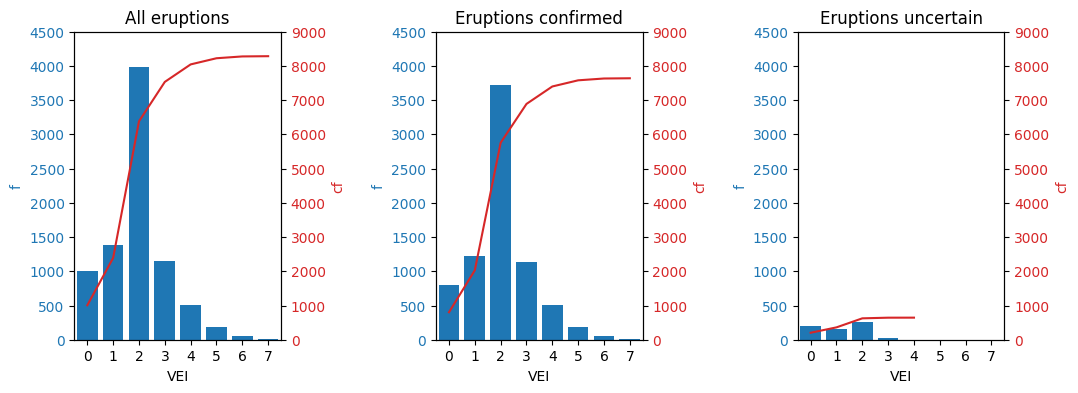

In [15]:
fig, ax1 = plt.subplots(1, 3, figsize=(12,4))
fig.subplots_adjust(wspace=0.75)

def displayPlot(axL, data, title):
    color = 'tab:blue'
    axL.set_xlabel('VEI')
    axL.set_ylabel('f', color = color)
    axL.set_title(title)
    axL.bar(data.index, data['f'], color = color)
    axL.tick_params(axis ='y', labelcolor = color)
    axL.set_xlim([-0.5,7.5])
    axL.set_xticks(np.arange(0,8))
    axL.set_ylim([0,4500])
    axR = axL.twinx()
    color = 'tab:red'
    axR.set_ylabel('cf', color = color)
    axR.plot(data.index, data['cf'], color = color)
    axR.tick_params(axis ='y', labelcolor = color)
    axR.set_ylim([0,9000])

displayPlot(ax1[0], vei_data_1, "All eruptions")
displayPlot(ax1[1], vei_data_2, "Eruptions confirmed")
displayPlot(ax1[2], vei_data_3, "Eruptions uncertain")